# Explicit Song Lyrics From 1990 - 2022
##### Prisha Bhatia and Kenta Terasaki


### Question
As with many other things in life, the music industry is constantly evolving. Current trends, the artists who are popular, and the interests of audience all have an influence on what is popular and what is talked about in music. A big trend we seem to see now is every song seems to be extremely explicit. Parents moderate this as they choose, some by letting their kids decide what they listen to, some by completely controlling their child's music, and some by only banning certain songs. We have heard many people from older generations mention that their generation was better and didn't have the "crude and disrespectful" values that we have. To put this to the test, we decided to see how music has evolved through the decades. 

We ask: how has the use of explicit lyrics in music changed from 1990 to 2022?


### Methods
Our data was obtained by using two data sources. Our first data source was the Wikipedia page listing the top 100 billboard music songs for every year from 1990 to 2022. In order to scrape this data, we installed the beautifulsoup4 package and imported requests and pandas to be able to work with our data.

##### Curse Word List Generation
The list of curse words was generated by us thinking about the curse words we knew. Between the two of us, we came up with a list of words we felt covered a significant majority of words in music. This list has limitations, such as not including plurals, not including other ways of saying a curse word (i.e. biotch/biatch is also used for bitch). Although there are many other curse words we did not cover, we feel confident in the list we have. We did not include any slurs of any kind in this list.

##### Wikipedia Data Collection
The get_table function in the get_data.py file takes in a year and returns the Wikipedia table associated with that year in list format. Specifically, it is a list of lists. The inner list contains the artist and the song ['Artist', 'Song']. The order that the songs are in is the order that they are ranked (i.e. the element in the list at index 0 is the number one song, and the element in the list at index 99 is the song in the 100th place). In the example below, we input the year 1990 and get a list of 100 artists and their corresponding songs. The list differs from the table in Wikipedia because it was formatted to fit the genius.com URL style. Hence, there are dashes instead of spaces, and extra characters like commas, periods, and ampersands are removed.

To ensure the latest version of the code shows up, run the cell below.

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In order to be able to access the function to scrape the data, we import it below.

In [43]:
from get_data import get_table
from bad_word_counter import word_counter_total
from plot_data import plot_all_words
from plot_data import plot_total_trend
from collections import Counter
from plot_data import plot_word_bank


The code below is an example of the get_table function's 1990 output.

In [8]:
nineties_list = get_table(1990)
print(nineties_list)

[['Wilson-Phillips', 'Hold-On'], ['Roxette', 'It-Must-Have-Been-Love'], ["Sinéad-O'Connor", 'Nothing-Compares-2-U'], ['Bell-Biv-DeVoe', 'Poison'], ['Madonna', 'Vogue'], ['Mariah-Carey', 'Vision-of-Love'], ['Phil-Collins', 'Another-Day-in-Paradise'], ['En-Vogue', 'Hold-On'], ['Billy-Idol', 'Cradle-of-Love'], ['Jon-Bon-Jovi', 'Blaze-of-Glory'], ['Bell-Biv-DeVoe', 'Do-Me'], ['Michael-Bolton', 'How-Am-I-Supposed-to-Live-Without-You'], ['Technotronic', 'Pump-Up-the-Jam'], ['Paula-Abdul', 'Opposites-Attract'], ['Janet-Jackson', 'Escapade'], ['Heart', 'All-I-Wanna-Do-Is-Make-Love-to-You'], ['Maxi-Priest', 'Close-to-You'], ['Alannah-Myles', 'Black-Velvet'], ['Wilson-Phillips', 'Release-Me'], ['Linda-Ronstadt', "Don't-Know-Much"], ['Lisa-Stansfield', 'All-Around-the-World'], ['Calloway', 'I-Wanna-Be-Rich'], ['Johnny-Gill', 'Rub-You-the-Right-Way'], ['Glenn-Medeiros', "She-Ain't-Worth-It"], ['Sweet-Sensation', 'If-Wishes-Came-True'], ['Snap', 'The-Power'], ['Nelson', "Can't-Live-Without-Your-Lov

##### Genius Data Collection
Our second data source was Genius, and in order to obtain this data we wrote three functions. The first function calls get_table, gets a sublist from that list, and generates a URL from the sublist. We use beautifulsoup to extract the lyrics from genius, and we count how many times particular swear words appear in that songs. This is done 100 times per year, and 3,200 times in total. These three functions work together to generate a list of dictionaries. Each dictionary contains 19 key-value pairs. 18 of the 19 keys represent a curse word we are searching for, and the value the kep maps to represents how many times that particular swear word appears in the top 100 songs from that year. The 19th key-value pair si the year the data is from.

This list is obtained below.

In [9]:
all_bad_words = []

start_year = 1990
end_year = 2022
all_bad_words.append(word_counter_total(start_year, end_year))

By printing all_bad_words, the data is shown below.

In [10]:
print(all_bad_words)

[[{'sex': 1, 'hell': 4, 'year': 1990}, {'sex': 8, 'hell': 1, 'year': 1991}, {'shit': 1, 'ass': 1, 'bitch': 1, 'dick': 1, 'sex': 4, 'pussy': 1, 'hell': 4, 'cock': 2, 'year': 1992}, {'fuck': 7, 'shit': 8, 'ass': 8, 'bitch': 1, 'dick': 1, 'motherfucker': 1, 'year': 1993}, {'fuck': 11, 'shit': 10, 'ass': 18, 'bitch': 13, 'crap': 1, 'hell': 8, 'motherfucker': 3, 'year': 1994}, {'fuck': 4, 'shit': 6, 'ass': 1, 'bitch': 3, 'dick': 32, 'sex': 3, 'hell': 4, 'year': 1995}, {'fuck': 42, 'shit': 6, 'ass': 2, 'bitch': 6, 'dick': 3, 'sex': 7, 'pussy': 2, 'hell': 10, 'cock': 1, 'motherfucker': 2, 'year': 1996}, {'fuck': 7, 'shit': 12, 'ass': 5, 'bitch': 2, 'dick': 1, 'sex': 10, 'crap': 1, 'hell': 6, 'year': 1997}, {'fuck': 19, 'shit': 19, 'ass': 5, 'bitch': 6, 'dick': 5, 'sex': 18, 'hell': 1, 'year': 1998}, {'fuck': 14, 'shit': 4, 'ass': 1, 'bitch': 3, 'dick': 3, 'pussy': 1, 'hell': 4, 'cock': 1, 'motherfucker': 1, 'hoe': 1, 'year': 1999}, {'fuck': 22, 'shit': 10, 'ass': 15, 'bitch': 3, 'dick': 6, 'p

The way we generated our dictionaries removes key-value pairs if the value for that particular key is zero. Since we need all the data, even if there are no instances of that word in any song, the code below creates a list of all the curse words we are checking for.

In [11]:
word_bank = ['fuck', 'shit', 'ass', 'bitch', 'cunt', 'dick', 'sex', 'slut', 'pussy', 'crap', 'hell', 'cock', 'penis', 'bussy', 'motherfucker', 'hoe', 'whore','munch']
data = all_bad_words[0]
for sub_dict in data:
    for bad_word in word_bank:
        if bad_word not in sub_dict:
            sub_dict[bad_word] = 0
print (data)

[{'sex': 1, 'hell': 4, 'year': 1990, 'fuck': 0, 'shit': 0, 'ass': 0, 'bitch': 0, 'cunt': 0, 'dick': 0, 'slut': 0, 'pussy': 0, 'crap': 0, 'cock': 0, 'penis': 0, 'bussy': 0, 'motherfucker': 0, 'hoe': 0, 'whore': 0, 'munch': 0}, {'sex': 8, 'hell': 1, 'year': 1991, 'fuck': 0, 'shit': 0, 'ass': 0, 'bitch': 0, 'cunt': 0, 'dick': 0, 'slut': 0, 'pussy': 0, 'crap': 0, 'cock': 0, 'penis': 0, 'bussy': 0, 'motherfucker': 0, 'hoe': 0, 'whore': 0, 'munch': 0}, {'shit': 1, 'ass': 1, 'bitch': 1, 'dick': 1, 'sex': 4, 'pussy': 1, 'hell': 4, 'cock': 2, 'year': 1992, 'fuck': 0, 'cunt': 0, 'slut': 0, 'crap': 0, 'penis': 0, 'bussy': 0, 'motherfucker': 0, 'hoe': 0, 'whore': 0, 'munch': 0}, {'fuck': 7, 'shit': 8, 'ass': 8, 'bitch': 1, 'dick': 1, 'motherfucker': 1, 'year': 1993, 'cunt': 0, 'sex': 0, 'slut': 0, 'pussy': 0, 'crap': 0, 'hell': 0, 'cock': 0, 'penis': 0, 'bussy': 0, 'hoe': 0, 'whore': 0, 'munch': 0}, {'fuck': 11, 'shit': 10, 'ass': 18, 'bitch': 13, 'crap': 1, 'hell': 8, 'motherfucker': 3, 'year': 1

Finally, we create a CSV to store the data and to ensure we do not have to keep running the code.

In [12]:
data = all_bad_words[0]


keys = list(data[0].keys())
keys.remove('year')
with open('output.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Year'] + keys)
    for d in data:
        writer.writerow([d['year']] + [d[k] for k in keys])


### Results

##### Bad Words vs Years
The graph below shows the progression of curse words being used throughout the years. Notable progressions include the word "bitch" doubling from 2004 to 2005 (going from about 25 to 60). The use of the word "fuck" skyrocketed after 2014 and reached a peak of about 116.

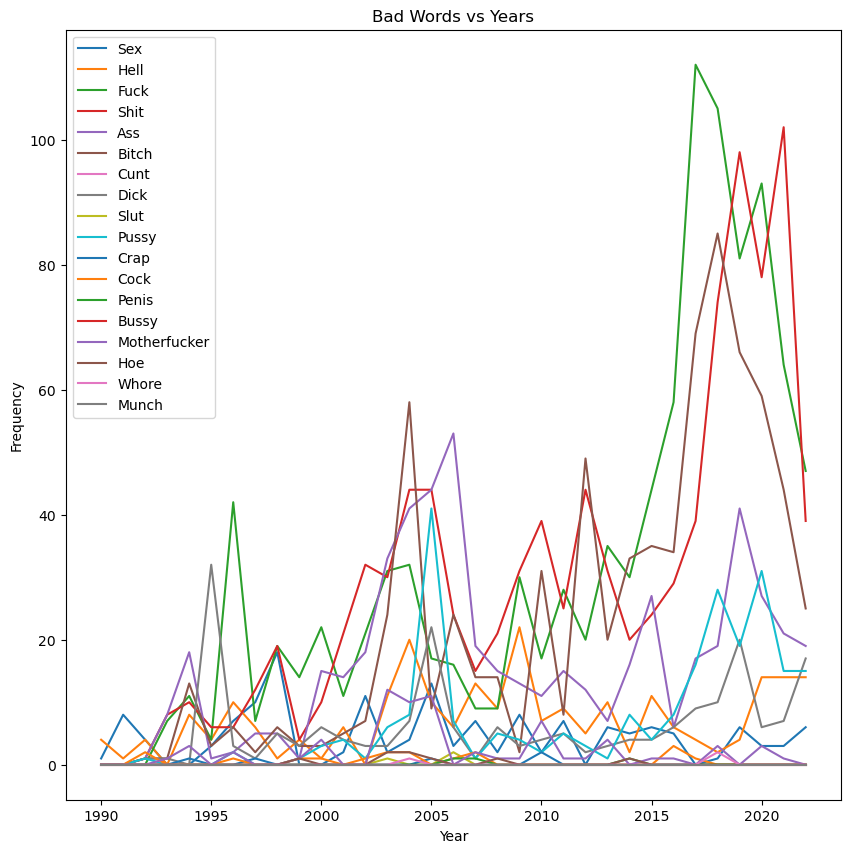

In [49]:
plot_all_words('output1990-2022.csv')

##### Total Bad Words Over Time
This graph helps visualize the increase in using curse words throughout the last 32 years. There is a fairly steady increase from 1990 followed by a significant jump from 2003 to 2004. There is a significant decrease after 2005, and then another steady increase for the next ten years (2006-2016). The number suddenly increased after 2016 and suddenly decreased after hitting its peak in 2019.

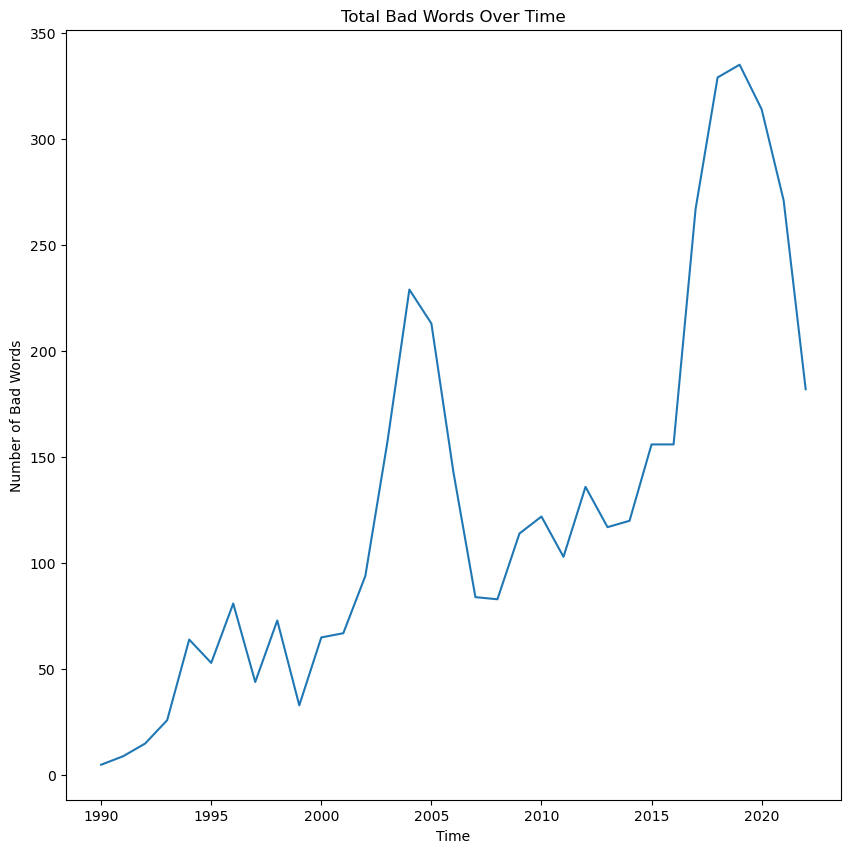

In [41]:
plot_total_trend('output1990-2022.csv')

##### Word Cloud
This word cloud shows a visual representation of the most common curse words in music. The larger the word is, the more common it is, and the smaller the word is, the less common it is. There are words that are not included in this list at all, such as "munch". If a word is not included in this list, it is because the word did not come up in any lyrics from any year.

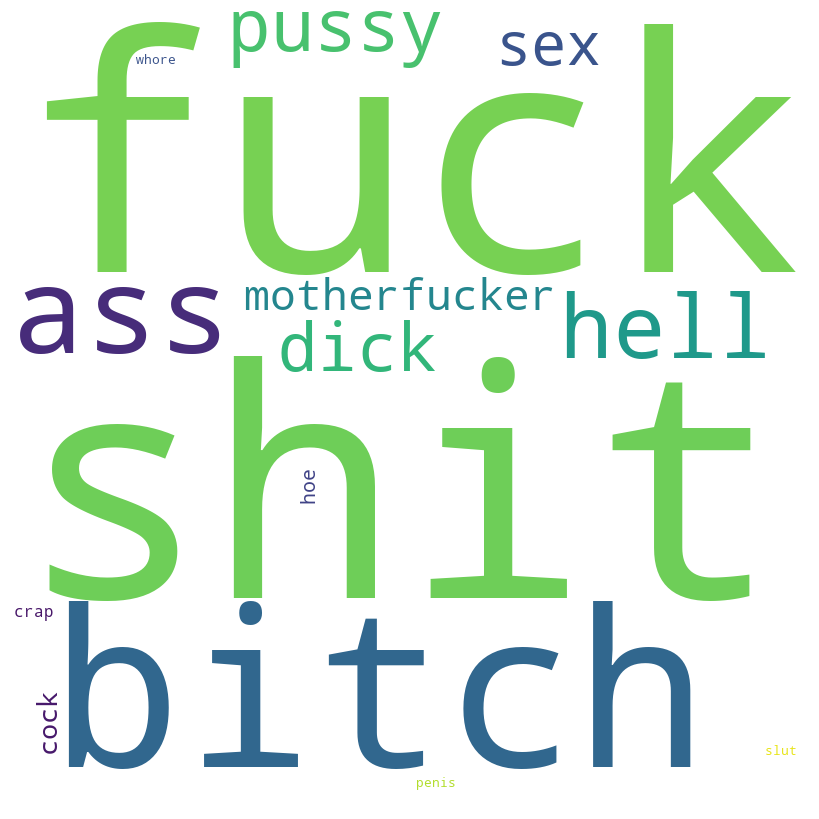

In [48]:
plot_word_bank('output1990-2022.csv')

### Conclusion

Overall, our data shows that the use of curse words/explicit words in music has significantly increased in the last 32 years. The data shows that there have been some significant spikes and decreases, but there is a clear upwards trend of the number of curse words used. This data also illustrates interesting trends with popular music. In 2020, Cardi B released the song WAP. Coinciding with that, there is a spike in the Bad Words vs. Years graph in the word "pussy" between 2019 and 2020. This is likely because her song mentions that word 16 times, which is about how much it spiked by. 

Something we had to consider when working on this project was not only the increased use of words over the years but the progression of words. In the early 2000s, biatch/biotch was used a lot, and now people simply use bitch. We hypothesize that if we had included those two words the number of curse words would have slightly increased. Similarly, we included the word "munch" in our list. This is because a song came out in early 2023 that mentions this, and it is now considered an explicit word. 

Due to language evolving, it is difficult to truly categorize the evolution of explicit words in songs. Looking at Shakespeare insults and curse words, for example, calling someone a stock-fish, as fat as butter, or ugly and venomous was rude and explicit. Compared to today, we don't even think of using words like those when we use explicit language. In order to be fully accurate, we would need to generate a list of explicit/curse words in the context of the year we are looking at. That way, we can track the presence of explicit content in music rather than the presence of certain explicit content. However, this project does give us insight into how different words come into popularity. We see the popularity of words like "pussy", "bitch", and "motherfucker" rise and fall, while we see the popularity of words like "shit" have a steady increase and then a sudden decrease right at the end of the graph. 

In the future, we would address inconsistencies like the ones mentioned above. Additionally, we would modify our code to be faster and more efficient. We would try to utilize the Genius API in order to do this. We attempted to use the API and ran into difficulties understanding the endpoints, the parameters the functions needed, and the scope of the API. Since we were pressed on time, we decided to use beautifulsoup to scrape the genius.com website. However, we understand that APIs are faster and more efficient, so with more time, we would understand how to get the API to work. 